# Energy Forecasting with ARIMA / SARIMAX
This notebook loads a dataframe with energy usage data and performs ARIMA and SARIMAX forecasting.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

df = pd.read_csv('../../data/steel_industry_data.csv')

df['date'] = pd.to_datetime(df['date'], dayfirst=True)

df = df.set_index('date')
y = df['Usage_kWh']

exog_cols = [
    'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh',
    'CO2(tCO2)',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor',
    'NSM'
]
exog = df[exog_cols]

train_size = int(len(df) * 0.8)
y_train = y[:train_size]
y_test = y[train_size:]
exog_train = exog[:train_size]
exog_test = exog[train_size:]

In [5]:
# Auto ARIMA
auto_model = auto_arima(y_train, exogenous=exog_train, seasonal=False, trace=True)
auto_model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=15.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=228786.434, Time=0.38 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=228649.962, Time=0.58 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=228642.276, Time=1.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=228784.436, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=14.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=228616.814, Time=3.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=24.34 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=228594.932, Time=5.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=26.07 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=227720.295, Time=6.29 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=227514.812, Time=9.13 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=227502.834, Time=14.59 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=16.18 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept 

,order,"(2, ...)"
,seasonal_order,"(0, ...)"
,start_params,None
,method,'lbfgs'
,maxiter,50
,suppress_warnings,True
,out_of_sample_size,0
,scoring,'mse'
,scoring_args,{}
,trend,None
,with_intercept,False


In [6]:
# Fit SARIMAX
order = auto_model.order
model = SARIMAX(y_train, exog=exog_train, order=order)
model_fit = model.fit()
model_fit.summary()

C:\Users\benja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\benja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\benja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Usage_kWh   No. Observations:                28032
Model:               SARIMAX(2, 1, 5)   Log Likelihood              -78341.484
Date:                Thu, 11 Dec 2025   AIC                         156710.967
Time:                        18:30:32   BIC                         156826.342
Sample:                             0   HQIC                        156748.107
                              - 28032                                         
Covariance Type:                  opg                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Lagging_Current_Reactive.Power_kVarh     0.6534      0.003    254.250      0.000       0.648       0.658
Leading_Current_Reactive_Power_kVarh    -0.0448      0.011     -4.061      0.000      -0.066      -0.023
CO2(tCO2)                             1166.6712      3.466    336.651      0.000    1159.879    1173.463
Lagging_Current_Power_Factor             0.3736      0.003    112.392      0.000       0.367       0.380
Leading_Current_Power_Factor             0.0985      0.003     29.561      0.000       0.092       0.105
NSM                                   -5.86e-06   4.32e-06     -1.358      0.175   -1.43e-05     2.6e-06
ar.L1                                   -0.1157      0.092     -1.252      0.211      -0.297       0.065
ar.L2                                    0.4276      0.044      9.807      0.000       0.342       0.513
ma.L1                                   -0.3339      0.092     -3.611      0.000      -0.515      -0.153
ma.L2                                   -0.5426      0.081     -6.680      0.000      -0.702      -0.383
ma.L3                                    0.1167      0.016      7.319      0.000       0.085       0.148
ma.L4                                   -0.0588      0.006    -10.398      0.000      -0.070      -0.048
ma.L5                                    0.0062      0.008      0.768      0.443      -0.010       0.022
sigma2                                  15.7302      0.071    221.875      0.000      15.591      15.869
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):             54690.03
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\benja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\benja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


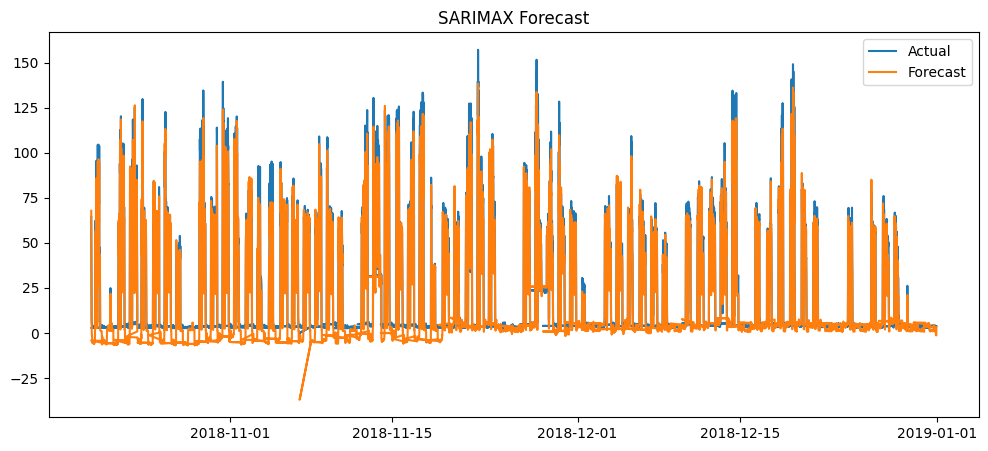

In [7]:
# Forecast
forecast = model_fit.predict(start=len(y_train), end=len(df)-1, exog=exog_test)

plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, forecast, label='Forecast')
plt.legend()
plt.title('SARIMAX Forecast')
plt.show()